Fe = 8000 Hz


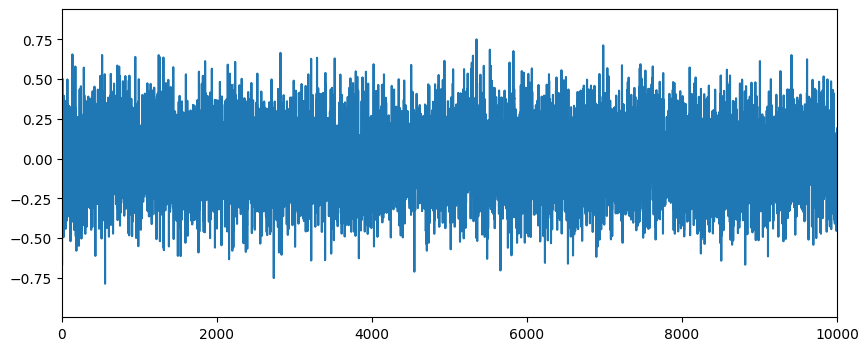

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf
from scipy.signal import butter, filtfilt

x, Fe = sf.read('mess.wav')
print('Fe =', Fe, 'Hz')

# Plot the signal
plt.figure(figsize=(10, 4))
plt.xlim(0, 10000)
plt.plot(x)

t=np.arange(0, len(x)/Fe, 1/Fe)

letters=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
frequences = [501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526]

In [4]:
ipd.Audio(x, rate=Fe)

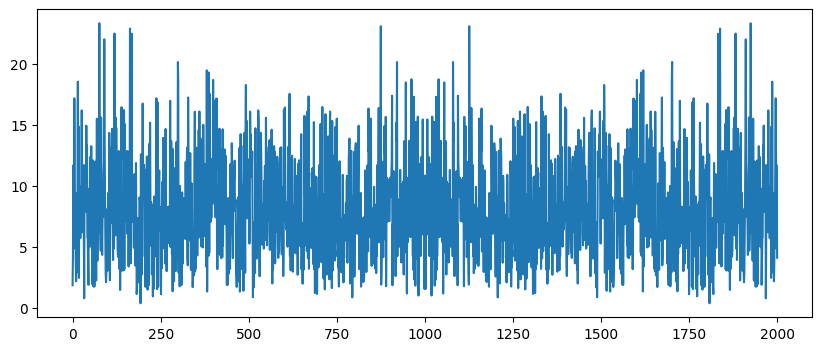

In [11]:
tfd2 = np.abs(np.fft.fft(x[2500:4501]))
plt.figure(figsize=(10, 4))
plt.plot(tfd2)

In [5]:
frequence_coupure = 1/526
ordre_filtre = 4
b, a = butter(ordre_filtre, frequence_coupure, btype='low')

X has 80000 elements


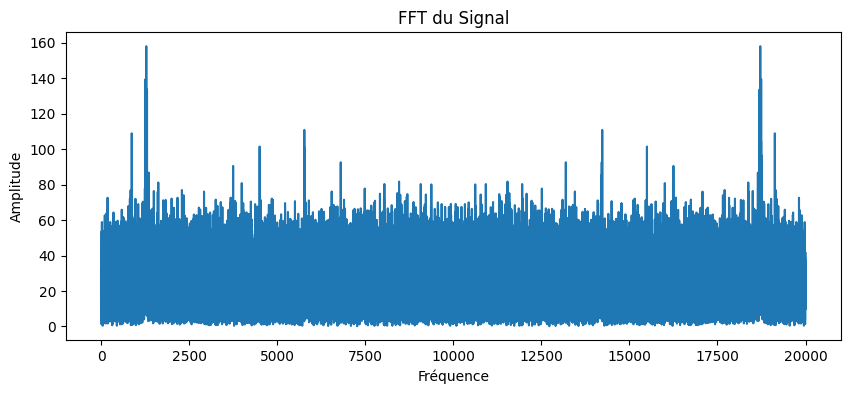

"\n# Plot the magnitude spectrum in logarithmic scale\nplt.figure(figsize=(10, 4))\nax = np.arange(0, len(X))\nax = ax/2\nplt.plot(ax, np.abs(X))\nplt.xlim(490, 600)\nplt.yscale('log')\nplt.xlabel('Fréquence')\nplt.ylabel('Amplitude')\nplt.title('FFT du Signal echelle logarithmique')\n"

In [6]:
# Perform Fourier transform
new_x = np.concatenate((x, np.zeros(30000)))
new_hanning = np.concatenate((np.hanning(len(x)), np.zeros(30000)))
X = np.fft.fft(new_x*new_hanning)
print('X has', len(X), 'elements')

X_filt = filtfilt(b,a,X)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
ax=np.arange(0,len(X))
ax=ax/4
plt.plot(ax,np.abs(X))
#plt.xlim(490, 560)
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('FFT du Signal')
plt.show()
'''
# Plot the magnitude spectrum in logarithmic scale
plt.figure(figsize=(10, 4))
ax = np.arange(0, len(X))
ax = ax/2
plt.plot(ax, np.abs(X))
plt.xlim(490, 600)
plt.yscale('log')
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('FFT du Signal echelle logarithmique')
'''

In [7]:
max = np.argmax(np.abs(X[2004:2105]))/4
#print(np.abs(X[2004:2105]))
print('La fréquence dominante est', np.round(max+501), 'Hz')

La fréquence dominante est 505.0 Hz


C:\Users\maell\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\maell\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


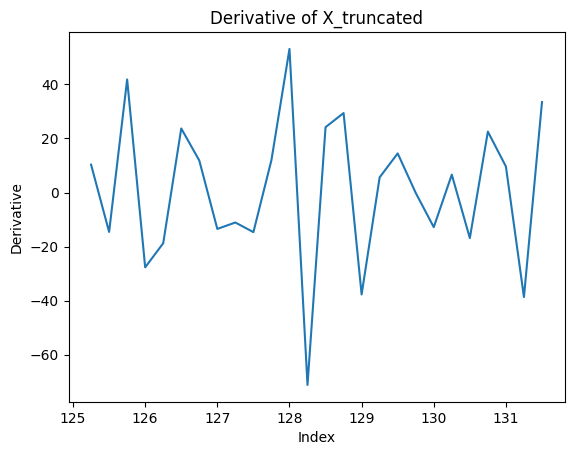

In [8]:
# Calculate the derivative of X_truncated
X_truncated = X[:2000]
derivative = np.diff(X_truncated)

# Plot the derivative between indices 501 and 526
plt.plot(ax[501:527], derivative[500:526])
plt.xlabel('Index')
plt.ylabel('Derivative')
plt.title('Derivative of X_truncated')
plt.show()

In [9]:
X_truncated = X[:2000]
max = np.argmax(np.abs(X_truncated))
#print('Fréquence dominante :', max*Fe/len(X), 'Hz')

# Décodage
f = max*Fe/len(X)
if (500<=f<=526):
    index = frequences.index(int(f))
print('Lettre :', letters[index])

NameError: name 'index' is not defined

Fe2 = 8000 Hz


0


In [ ]:
audio , Fe2 = sf.read('mess_ssespace.wav')
print('Fe2 =', Fe2, 'Hz')

print(len(audio))
message=[]

while len(audio)>499:
    x=audio[:2000]
    new_x = np.concatenate((x, np.zeros(30000)))
    new_hanning = np.concatenate((np.hanning(len(x)), np.zeros(30000)))
    X = np.fft.fft(new_x*new_hanning)
    max = np.argmax(np.abs(X[2004:2105]))/4
    freq = np.round(max+501)
    print('La fréquence dominante est', freq, 'Hz')
    if (500<=freq<=526):
        index = frequences.index(int(freq))
        print('Lettre :', letters[index])
        message.append(letters[index])
    audio=audio[2500:]

message_str = ''.join(message)
print('Message :', message_str)


Fe2 = 8000 Hz
25000
La fréquence dominante est 503.0 Hz
Lettre : C
La fréquence dominante est 506.0 Hz
Lettre : F
La fréquence dominante est 518.0 Hz
Lettre : R
La fréquence dominante est 520.0 Hz
Lettre : T
La fréquence dominante est 516.0 Hz
Lettre : P
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante est 519.0 Hz
Lettre : S
La fréquence dominante est 514.0 Hz
Lettre : N
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante est 512.0 Hz
Lettre : L
Message : CFRTPASNAL


In [ ]:
audio , Fe2 = sf.read('mess_ssespace.wav')
print('Fe2 =', Fe2, 'Hz')

print(len(audio))
message=[]

precision = 12

while len(audio)>499:
    x=audio[:2000]
    new_x = np.concatenate((x, np.zeros(8000*(2**precision)-len(x))))
    new_hanning = np.concatenate((np.hanning(len(x)), np.zeros(8000*(2**precision)-len(x))))
    X = np.fft.fft(new_x*new_hanning)
    borneinf = 501*(2**precision)
    bornesup = 526*(2**precision)+1
    max = np.argmax(np.abs(X[borneinf:bornesup]))/(2**precision)
    freq = np.round(max+501)
    print('La fréquence dominante est', max+501, 'Hz')
    print('La fréquence dominante est', freq, 'Hz')
    if (500<=freq<=526):
        index = frequences.index(int(freq))
        print('Lettre :', letters[index])
        message.append(letters[index])
    audio=audio[2500:]

message_str = ''.join(message)
print('Message :', message_str)

Fe2 = 8000 Hz
25000
La fréquence dominante est 503.294189453125 Hz
La fréquence dominante est 503.0 Hz
Lettre : C
La fréquence dominante est 505.4365234375 Hz
La fréquence dominante est 505.0 Hz
Lettre : E
La fréquence dominante est 518.5908203125 Hz
La fréquence dominante est 519.0 Hz
Lettre : S
La fréquence dominante est 520.42578125 Hz
La fréquence dominante est 520.0 Hz
Lettre : T
La fréquence dominante est 515.424560546875 Hz
La fréquence dominante est 515.0 Hz
Lettre : O
La fréquence dominante est 501.048828125 Hz
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante est 518.709228515625 Hz
La fréquence dominante est 519.0 Hz
Lettre : S
La fréquence dominante est 513.460205078125 Hz
La fréquence dominante est 513.0 Hz
Lettre : M
La fréquence dominante est 501.0 Hz
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante est 511.5869140625 Hz
La fréquence dominante est 512.0 Hz
Lettre : L
Message : CESTOASMAL


In [ ]:
audio , Fe2 = sf.read('mess_difficile.wav')
print('Fe2 =', Fe2, 'Hz')

print(len(audio))
message=[]

precision = 10

while len(audio)>499:
    x=audio[:2000]
    if np.all(x==0):
        message.append(' ')
    else:
        new_x = np.concatenate((x, np.zeros(8000*(2**precision)-len(x))))
        new_hanning = np.concatenate((np.hanning(len(x)), np.zeros(8000*(2**precision)-len(x))))
        X = np.fft.fft(new_x*new_hanning)
        borneinf = 501*(2**precision)
        bornesup = 526*(2**precision)+1
        max = np.argmax(np.abs(X[borneinf:bornesup]))/(2**precision)
        freq = np.round(max+501)
        print('La fréquence dominante est', max+501, 'Hz')
        print('La fréquence dominante est', freq, 'Hz')
        if (500<=freq<=526):
            index = frequences.index(int(freq))
            print('Lettre :', letters[index])
            message.append(letters[index])
    audio=audio[2500:]

message_str = ''.join(message)
print('Message :', message_str)
print(len(message_str))

Fe2 = 8000 Hz
72500
La fréquence dominante est 501.0 Hz
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante est 505.53125 Hz
La fréquence dominante est 506.0 Hz
Lettre : F
La fréquence dominante est 520.14453125 Hz
La fréquence dominante est 520.0 Hz
Lettre : T
La fréquence dominante est 526.0 Hz
La fréquence dominante est 526.0 Hz
Lettre : Z
La fréquence dominante est 501.0 Hz
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante est 504.71484375 Hz
La fréquence dominante est 505.0 Hz
Lettre : E
La fréquence dominante est 517.3466796875 Hz
La fréquence dominante est 517.0 Hz
Lettre : Q
La fréquence dominante est 511.9951171875 Hz
La fréquence dominante est 512.0 Hz
Lettre : L
La fréquence dominante est 521.4853515625 Hz
La fréquence dominante est 521.0 Hz
Lettre : U
La fréquence dominante est 515.0 Hz
La fréquence dominante est 515.0 Hz
Lettre : O
La fréquence dominante est 501.0 Hz
La fréquence dominante est 501.0 Hz
Lettre : A
La fréquence dominante

In [ ]:
audio , Fe2 = sf.read('mess.wav')

with open('message.txt', 'w') as f:
    f.writelines('\n'.join(str(sample) for sample in audio))